# NASA Detection of Hazardous Asteroids

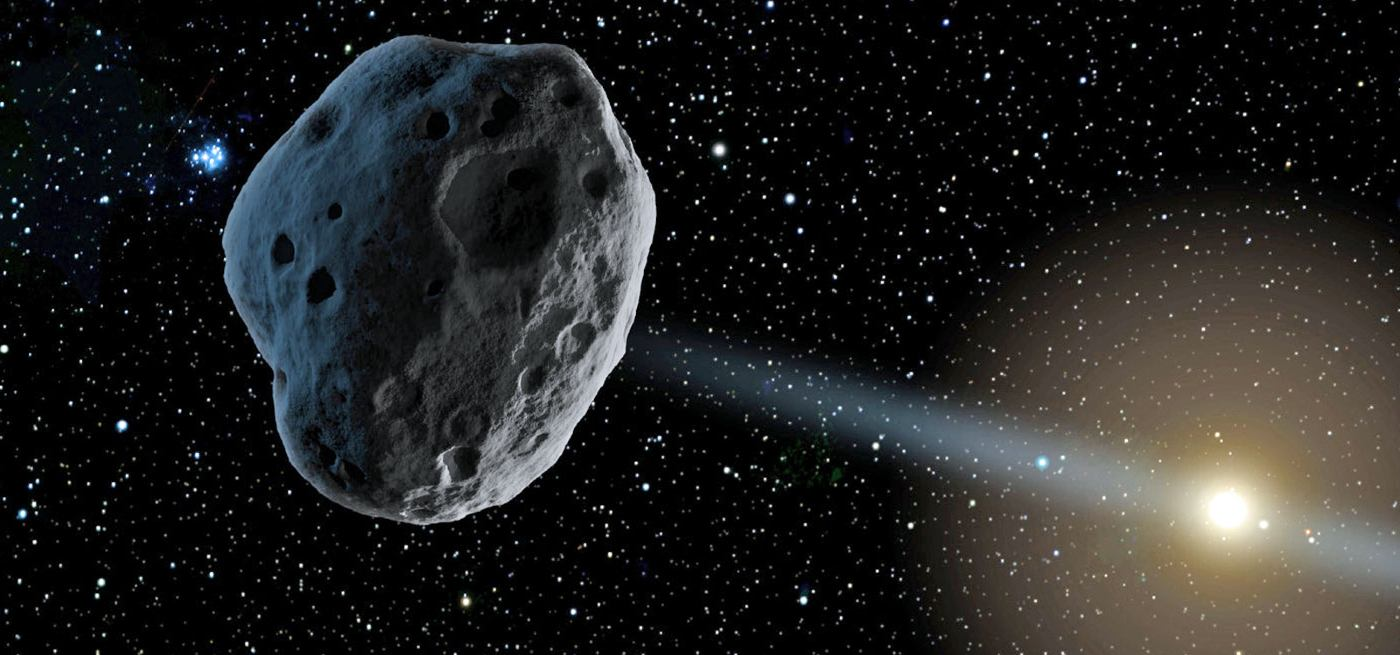

We take a database containing 40 columns with information of each aspect of an asteroid

# Dataset information

‘Neo Reference ID’: This feature denotes the reference ID assigned to an asteroid.
‘Name’: This feature denotes the name given to an asteroid.
‘Absolute Magnitude’: An asteroid’s absolute magnitude is the visual magnitude an observer would record if the asteroid were placed 1 Astronomical Unit (AU) away, and 1 AU from the Sun and at a zero phase angle.
‘Est Dia in KM(min)’: Estimated diameter of the asteroid in kilometres (KM).
‘Orbiting Body’: This feature denotes the planet around which the asteroid is revolving.
‘Jupiter Tisserand Invariant’: This feature denotes the Tisserand’s parameter for the asteroid. 
‘Eccentricity’: This feature denotes the value of eccentricity of the asteroid’s orbit. The smaller the eccentricity number, the more circular the realm.
‘Semi Major Axis’: This feature denotes the value of the Semi Major Axis of the asteroid’s orbit.
‘Orbital Period’: Orbital period refers to the time taken by the asteroid to make one full revolution around its orbiting body.
‘Perihelion Distance’:  For a body orbiting the Sun, the point of least distance is the perihelion.
‘Aphelion Dist’: For a body orbiting the Sun, the point of greatest distance is the aphelion.
‘Hazardous’: This feature denotes whether the asteroid is hazardous or not.

In [196]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow 

from tensorflow import keras
from keras.layers import Dense

# Reading the dataset

In [2]:
data = pd.read_csv("nasa.csv")
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
data.shape
#This dataset has 4687 rows and 40 columns

(4687, 40)

In [4]:
data.columns


Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [5]:
data.isna().sum()
#Check for any na values : we observe than there is no na values

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

# Target variable 

In [6]:
data['Hazardous']


0        True
1       False
2        True
3       False
4        True
        ...  
4682    False
4683    False
4684    False
4685    False
4686    False
Name: Hazardous, Length: 4687, dtype: bool

# Data Cleaning

In [7]:
data = data.drop(['Name','Neo Reference ID','Close Approach Date','Orbit Determination Date','Orbiting Body','Equinox'],axis=1)
data

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,790156800000,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,1473318000000,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,False
4683,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,1473318000000,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,False
4684,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,1473318000000,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,False
4685,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,851.187094,1473318000000,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,False


In [8]:
data = data.drop(['Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in Feet(min)','Est Dia in Feet(max)'],axis=1)
data

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.127220,0.284472,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,6.275369e+07,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.300,0.146068,0.326618,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,5.729815e+07,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.300,0.231502,0.517654,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7.622912e+06,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.400,0.008801,0.019681,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,4.268362e+07,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.600,0.127220,0.284472,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,6.101082e+07,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,1473318000000,22.154265,79755.354273,49556.875548,0.041361,16.089413,6.187511e+06,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,False
4683,28.200,0.006089,0.013616,1473318000000,3.225150,11610.539577,7214.337772,0.006469,2.516399,9.677324e+05,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,False
4684,22.700,0.076658,0.171412,1473318000000,7.191642,25889.910626,16086.983633,0.061009,23.732393,9.126775e+06,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,False
4685,21.800,0.116026,0.259442,1473318000000,11.352090,40867.522309,25393.489071,0.260760,101.435493,3.900908e+07,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,False


In [9]:
data = data.drop(['Relative Velocity km per sec','Miles per hour','Miss Dist.(lunar)','Miss Dist.(kilometers)','Miss Dist.(miles)'],axis=1)
data

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(Astronomical),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.127220,0.284472,788947200000,22017.003799,0.419483,17,5,0.025282,4.634,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.300,0.146068,0.326618,788947200000,65210.346095,0.383014,21,3,0.186935,5.457,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.300,0.231502,0.517654,789552000000,27326.560182,0.050956,22,0,0.043058,4.557,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.400,0.008801,0.019681,790156800000,40225.948191,0.285322,7,6,0.005512,5.093,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.600,0.127220,0.284472,790156800000,35426.991794,0.407832,25,1,0.034798,5.154,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,1473318000000,79755.354273,0.041361,4,8,0.019777,5.156,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,False
4683,28.200,0.006089,0.013616,1473318000000,11610.539577,0.006469,2,6,0.006451,5.742,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,False
4684,22.700,0.076658,0.171412,1473318000000,25889.910626,0.061009,17,6,0.059973,4.410,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,False
4685,21.800,0.116026,0.259442,1473318000000,40867.522309,0.260760,6,5,0.177510,4.477,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,False


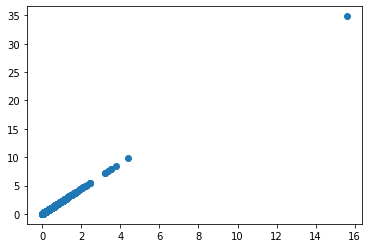

In [199]:
x = data['Est Dia in KM(min)']
y = data['Est Dia in KM(max)']

plt.scatter(x, y)
plt.show()
# these two columns are completely correlated as a linear relationship between the two can be observed from their scatter plot.

In [200]:
data = data.drop(['Est Dia in KM(min)'],axis=1)
data

,Absolute Magnitude,Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per hr,Miss Dist.(Astronomical),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,0.284472,788947200000,22017.003799,0.419483,17,5,0.025282,4.634,2458000.5,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.300,0.326618,788947200000,65210.346095,0.383014,21,3,0.186935,5.457,2458000.5,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.300,0.517654,789552000000,27326.560182,0.050956,22,0,0.043058,4.557,2458000.5,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.400,0.019681,790156800000,40225.948191,0.285322,7,6,0.005512,5.093,2458000.5,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.600,0.284472,790156800000,35426.991794,0.407832,25,1,0.034798,5.154,2458000.5,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.098637,1473318000000,79755.354273,0.041361,4,8,0.019777,5.156,2457637.5,...,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,0
4683,28.200,0.013616,1473318000000,11610.539577,0.006469,2,6,0.006451,5.742,2458000.5,...,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,0
4684,22.700,0.171412,1473318000000,25889.910626,0.061009,17,6,0.059973,4.410,2458000.5,...,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,0
4685,21.800,0.259442,1473318000000,40867.522309,0.260760,6,5,0.177510,4.477,2458000.5,...,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,0


In [201]:
df = pd.DataFrame(data)

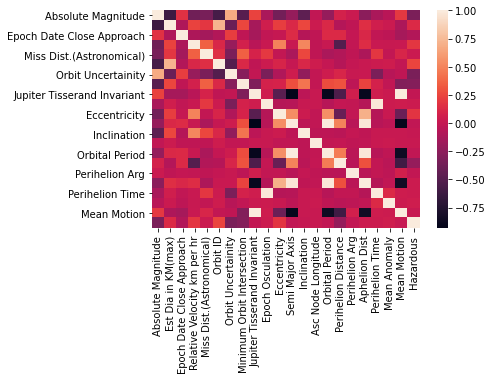

In [202]:
df
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hazardous', ylabel='count'>

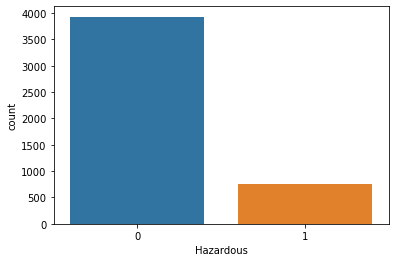

In [203]:
sns.countplot(data['Hazardous'])

In [204]:
data.dtypes

Absolute Magnitude             float64
Est Dia in KM(max)             float64
Epoch Date Close Approach        int64
Relative Velocity km per hr    float64
Miss Dist.(Astronomical)       float64
Orbit ID                         int64
Orbit Uncertainity               int64
Minimum Orbit Intersection     float64
Jupiter Tisserand Invariant    float64
Epoch Osculation               float64
Eccentricity                   float64
Semi Major Axis                float64
Inclination                    float64
Asc Node Longitude             float64
Orbital Period                 float64
Perihelion Distance            float64
Perihelion Arg                 float64
Aphelion Dist                  float64
Perihelion Time                float64
Mean Anomaly                   float64
Mean Motion                    float64
Hazardous                        int64
dtype: object

In [205]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data.iloc[:,-1]=labelencoder.fit_transform(data.iloc[:,-1].values)

In [206]:
data.dtypes

Absolute Magnitude             float64
Est Dia in KM(max)             float64
Epoch Date Close Approach        int64
Relative Velocity km per hr    float64
Miss Dist.(Astronomical)       float64
Orbit ID                         int64
Orbit Uncertainity               int64
Minimum Orbit Intersection     float64
Jupiter Tisserand Invariant    float64
Epoch Osculation               float64
Eccentricity                   float64
Semi Major Axis                float64
Inclination                    float64
Asc Node Longitude             float64
Orbital Period                 float64
Perihelion Distance            float64
Perihelion Arg                 float64
Aphelion Dist                  float64
Perihelion Time                float64
Mean Anomaly                   float64
Mean Motion                    float64
Hazardous                        int64
dtype: object

In [207]:
X = data.iloc[:,:-1].values #8 not included
Y = data.iloc[:,-1].values #1 not included

# QUESTION 1

In [208]:
#SPLITING THE DATASET
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [209]:
# scaling the data 
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [210]:
# A Funtion to calculate statistics of the given model (not able to do ann model as it is not from sklearn)
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
def stats(model):
    
    
    cm = confusion_matrix(Y_test,model.predict(X_test))
    
    score = accuracy_score(Y_test,model.predict(X_test) )
    print("Confusion Matrix :")
    display(pd.DataFrame(cm).transpose())
    display(pd.DataFrame(classification_report(Y_test,model.predict(X_test),output_dict=True)).transpose())
    
    print('Testing Accuracy = "{}"'.format(score ))
    
    score = accuracy_score(Y_train,model.predict(X_train) )
    print('Training Accuracy = "{}"'.format(score ))
    print()
    return score

# DECISION TREE

Set Criterion as entopy 



Set random state as 13

In [229]:
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,Y_train)
    

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [230]:
stats(tree)

Confusion Matrix :


,0,1
0,787,13
1,6,132


,precision,recall,f1-score,support
0,0.983750,0.992434,0.988073,793.000000
1,0.956522,0.910345,0.932862,145.000000
accuracy,0.979744,0.979744,0.979744,0.979744
macro avg,0.970136,0.951389,0.960468,938.000000
weighted avg,0.979541,0.979744,0.979538,938.000000


Testing Accuracy = "0.9797441364605544"
Training Accuracy = "1.0"



1.0

 Observe testing accuracy is .98

# K nearest neighbors

Set number of neighbors as a varable to find the optimum value

In [231]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics


testACC = []
for k in range(1,30):
   cl = KNeighborsClassifier(n_neighbors=k)
   cl.fit(X_train, Y_train)
   Y_pred = cl.predict(X_test)
   
   testACC.append(metrics.accuracy_score(Y_test,Y_pred))
result = metrics.confusion_matrix(Y_test, Y_pred)


Text(0, 0.5, 'Accuracy')

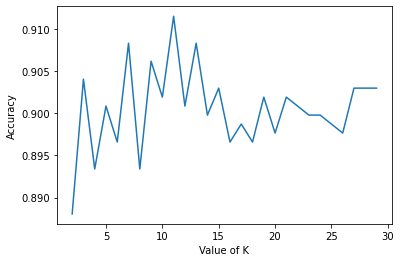

In [232]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

Maximum at at 11

In [233]:
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=11,metric = 'minkowski', p=2)
    knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=11)

In [234]:
stats(knn)

Confusion Matrix :


,0,1
0,779,69
1,14,76


,precision,recall,f1-score,support
0,0.918632,0.982346,0.949421,793.000000
1,0.844444,0.524138,0.646809,145.000000
accuracy,0.911514,0.911514,0.911514,0.911514
macro avg,0.881538,0.753242,0.798115,938.000000
weighted avg,0.907164,0.911514,0.902642,938.000000


Testing Accuracy = "0.9115138592750534"
Training Accuracy = "0.9189117097892772"



0.9189117097892772

Observe .9189 accuracy

# Naive Bayes 

In [235]:
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)

GaussianNB()

In [236]:
stats(gauss)

Confusion Matrix :


,0,1
0,769,19
1,24,126


,precision,recall,f1-score,support
0,0.975888,0.969735,0.972802,793.000000
1,0.840000,0.868966,0.854237,145.000000
accuracy,0.954158,0.954158,0.954158,0.954158
macro avg,0.907944,0.919350,0.913520,938.000000
weighted avg,0.954882,0.954158,0.954474,938.000000


Testing Accuracy = "0.9541577825159915"
Training Accuracy = "0.9479861296345692"



0.9479861296345692

Observe .9479 accuracy

# Artificial Neural Networks


It has 3 layers :


INPUT layer - 8 units

HIDDEN layer - 6 units

OUTER layer - 1 unit

Activation function is sigmoid

In [92]:
from keras.models import Sequential
from keras.layers import Dense

In [254]:
classifier = Sequential()
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 21))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = classifier.fit(X_train, Y_train, validation_split = 0.2, batch_size = 10, epochs = 100,verbose = 0)
score, acc = classifier.evaluate(X_train, Y_train,batch_size=10)
print('Train accuracy:', acc)
# TEST PREDICTIONS
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)
# TRAIN PREDICTIONS
Y_train_pred = classifier.predict(X_train)
Y_train_pred = (Y_train_pred > 0.5)
score, acc = classifier.evaluate(X_test, Y_test,batch_size=10)
print('Test accuracy:', acc)

375/375 [==============================] - 0s 814us/step - loss: 0.0179 - accuracy: 0.9949
Train accuracy: 0.9949319958686829
94/94 [==============================] - 0s 796us/step - loss: 0.0404 - accuracy: 0.9904
Test accuracy: 0.9904051423072815


In [253]:
print(confusion_matrix(Y_test, Y_pred))
display(pd.DataFrame(classification_report(Y_test,Y_pred,output_dict=True)).transpose())
score = accuracy_score(Y_test,Y_pred )
print('Testing Accuracy = "{}"'.format(score ))

score = accuracy_score(Y_train,Y_train_pred )
print('Training Accuracy = "{}"'.format(score ))

[[786   7]
 [  4 141]]


,precision,recall,f1-score,support
0,0.994937,0.991173,0.993051,793.000000
1,0.952703,0.972414,0.962457,145.000000
accuracy,0.988273,0.988273,0.988273,0.988273
macro avg,0.973820,0.981793,0.977754,938.000000
weighted avg,0.988408,0.988273,0.988322,938.000000


Testing Accuracy = "0.988272921108742"
Training Accuracy = "0.9957321952520672"


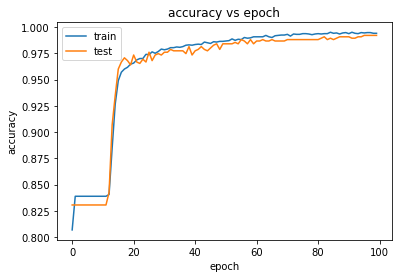

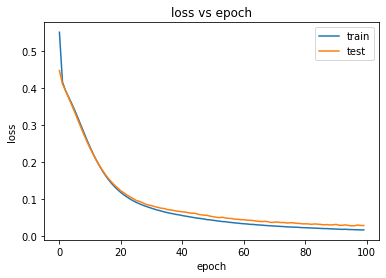

In [256]:
#ACCURACY VS EPOCH
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
#LOSS VS EPOCH
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# QUESTION 2  - Different Activation function

 We use sigmoid as observed above then tanh and finally elu as activation functions 
    
Rest of the functions showed less accuracy 

In [265]:
classifier = Sequential()
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 21))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'tanh'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'tanh'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = classifier.fit(X_train, Y_train, validation_split = 0.2, batch_size = 10, epochs = 100,verbose = 0)
score, acc = classifier.evaluate(X_train, Y_train,batch_size=10)
print('Train accuracy:', acc)
# TEST PREDICTIONS
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)
# Training PREDICTIONS
Y_train_pred = classifier.predict(X_train)
Y_train_pred = (Y_train_pred > 0.5)
score, acc = classifier.evaluate(X_test, Y_test,batch_size=10)
print('Test accuracy:', acc)

375/375 [==============================] - 0s 798us/step - loss: 0.0994 - accuracy: 0.9597
Train accuracy: 0.9597225785255432
94/94 [==============================] - 0s 804us/step - loss: 0.1152 - accuracy: 0.9552
Test accuracy: 0.9552238583564758


In [266]:
print(confusion_matrix(Y_test, Y_pred))
display(pd.DataFrame(classification_report(Y_test,Y_pred,output_dict=True)).transpose())
score = accuracy_score(Y_test,Y_pred )
print('Testing Accuracy = "{}"'.format(score ))
score = accuracy_score(Y_train,Y_train_pred )
print('Training Accuracy = "{}"'.format(score ))

[[764  29]
 [ 13 132]]


,precision,recall,f1-score,support
0,0.983269,0.963430,0.973248,793.000000
1,0.819876,0.910345,0.862745,145.000000
accuracy,0.955224,0.955224,0.955224,0.955224
macro avg,0.901572,0.936887,0.917997,938.000000
weighted avg,0.958011,0.955224,0.956166,938.000000


Testing Accuracy = "0.9552238805970149"
Training Accuracy = "0.9597225926913844"


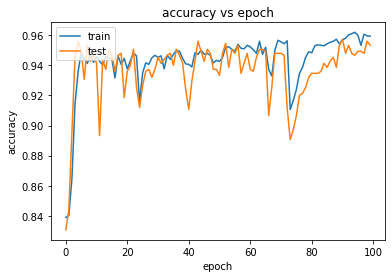

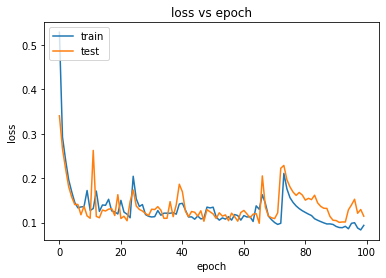

In [267]:
#ACCURACY VS EPOCH
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#LOSS VS EPOCH
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

ELU 


In [273]:
classifier = Sequential()
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'elu', input_dim = 21))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'elu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'elu'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = classifier.fit(X_train, Y_train, validation_split = 0.2, batch_size = 10, epochs = 100,verbose = 0)
score, acc = classifier.evaluate(X_train, Y_train,batch_size=10)
print('Train accuracy:', acc)
# TEST PREDICTIONS
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)
# Training PREDICTIONS
Y_train_pred = classifier.predict(X_train)
Y_train_pred = (Y_train_pred > 0.5)
score, acc = classifier.evaluate(X_test, Y_test,batch_size=10)
print('Test accuracy:', acc)

375/375 [==============================] - 0s 782us/step - loss: 0.0789 - accuracy: 0.9867
Train accuracy: 0.9866631031036377
94/94 [==============================] - 0s 806us/step - loss: 0.1602 - accuracy: 0.9819
Test accuracy: 0.9818763136863708


In [274]:
print(confusion_matrix(Y_test, Y_pred))
display(pd.DataFrame(classification_report(Y_test,y_pred,output_dict=True)).transpose())
score = accuracy_score(Y_test,y_pred )
print('Testing Accuracy = "{}"'.format(score ))

score = accuracy_score(Y_train,y_train_pred )
print('Training Accuracy = "{}"'.format(score ))

[[777  16]
 [  1 144]]


,precision,recall,f1-score,support
0,0.991128,0.986129,0.988622,793.00000
1,0.926174,0.951724,0.938776,145.00000
accuracy,0.980810,0.980810,0.980810,0.98081
macro avg,0.958651,0.968926,0.963699,938.00000
weighted avg,0.981087,0.980810,0.980917,938.00000


Testing Accuracy = "0.9808102345415778"
Training Accuracy = "0.9869298479594558"


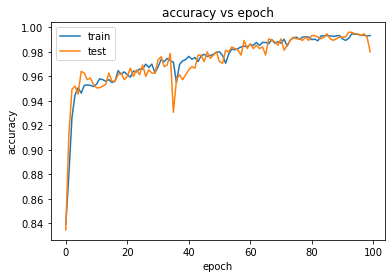

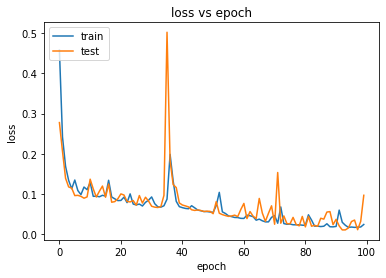

In [275]:
#ACCURACY VS EPOCH
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy vs epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

#LOSS VS EPOCH
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss vs epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# QUESTION 3 - Diffrent number of nodes in hidden layer

A function to traverse the algotrithm with values according to val array  

In [279]:
#Q3
val = [1,2,3,4,5,6,7,8,9,10] # 4 is square root of 21 
                     #10 - half number of 21 

testACC = []

def fun3():
   
    for i in val:
        print("Hidden nodes = ",i)
        classifier = Sequential()
        classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 21))
        classifier.add(Dense(units = i, kernel_initializer = 'uniform', activation = 'sigmoid'))
        classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
        classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
        history = classifier.fit(X_train, Y_train, validation_split = 0.2, batch_size = 10, epochs = 100,verbose = 0)
        score, acc = classifier.evaluate(X_train, Y_train,batch_size=10)
        print('Train accuracy:', acc)
        y_pred = classifier.predict(X_test)
        y_pred = (y_pred > 0.5)
        y_train_pred = classifier.predict(X_train)
        y_train_pred = (y_train_pred > 0.5)
        score, acc = classifier.evaluate(X_test, Y_test,batch_size=10)
        print('Test accuracy:', acc)
        testACC.append(acc)


In [280]:
fun3()

Hidden nodes =  1
375/375 [==============================] - 0s 794us/step - loss: 0.0196 - accuracy: 0.9947
Train accuracy: 0.994665265083313
94/94 [==============================] - 0s 809us/step - loss: 0.0390 - accuracy: 0.9883
Test accuracy: 0.9882729053497314
Hidden nodes =  2
375/375 [==============================] - 0s 815us/step - loss: 0.0179 - accuracy: 0.9957
Train accuracy: 0.9957321882247925
94/94 [==============================] - 0s 796us/step - loss: 0.0402 - accuracy: 0.9883
Test accuracy: 0.9882729053497314
Hidden nodes =  3
375/375 [==============================] - 0s 799us/step - loss: 0.0176 - accuracy: 0.9955
Train accuracy: 0.9954654574394226
94/94 [==============================] - 0s 817us/step - loss: 0.0393 - accuracy: 0.9893
Test accuracy: 0.9893389940261841
Hidden nodes =  4
375/375 [==============================] - 0s 805us/step - loss: 0.0182 - accuracy: 0.9949
Train accuracy: 0.9949319958686829
94/94 [==============================] - 0s 811us/step -

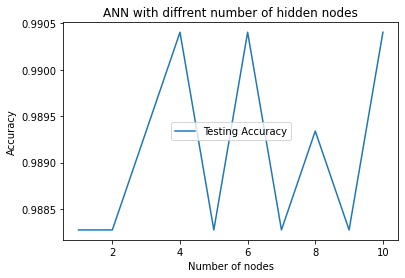

In [281]:
plt.title('ANN with diffrent number of hidden nodes')
plt.plot(val, testACC, label='Testing Accuracy')

plt.legend()
plt.xlabel('Number of nodes')
plt.ylabel('Accuracy')
plt.show()

# QUESTION 4 

Spliting the dataset to 1/2 , 1/4 and 3/4

In [282]:
def everyAlgo(data1):
    val = []
    X = data3.iloc[:,:-1].values #8 not included
    Y = data3.iloc[:,-1].values #1 not included
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
    sc= StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    print('-'*80)
    print()
    print()
    print("ANN")
    
    classifier = Sequential()
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 21))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    history = classifier.fit(X_train, Y_train, validation_split = 0.2, batch_size = 10, epochs = 100,verbose = 0)
    score, acc = classifier.evaluate(X_train, Y_train,batch_size=10)
    print('Train accuracy:', acc)
    y_pred = classifier.predict(X_test)
    y_pred = (y_pred > 0.5)
    y_train_pred = classifier.predict(X_train)
    y_train_pred = (y_train_pred > 0.5)
    score, acc = classifier.evaluate(X_test, Y_test,batch_size=10)
    print('Test accuracy:', acc)
    val.append(acc)
    print(confusion_matrix(Y_test, y_pred))
    display(pd.DataFrame(classification_report(Y_test,y_pred,output_dict=True)).transpose())
    score = accuracy_score(Y_test,y_pred )
    print('Testing Accuracy = "{}"'.format(score ))
    score = accuracy_score(Y_train,y_train_pred )
    print('Training Accuracy = "{}"'.format(score ))
    
    #knearestneibours
    print('-'*80)
    print()
    print()
    print("KNN")
    
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski', p=2)
    knn.fit(X_train,Y_train)
    val1 = stats(knn)
    val.append(val1)
    print('-'*80)
    print()
    print()
    print("Naive Bayes")
    
    #GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)
    val1 = stats(gauss)
    val.append(val1)
    print('-'*80)
    print()
    print()
    print("Decision Tree Classifier")
    
    #Decision tree classsifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,Y_train)
    val1 = stats(tree)
    val.append(val1)
    return val


In [283]:
data3 = data.sample(frac=0.5,random_state=55)
data4 = data.sample(frac=0.25,random_state=124)
data5 = data.sample(frac=0.75,random_state=67)

In [284]:
data.shape

(4687, 22)

In [285]:
data3.shape

(2344, 22)

In [286]:
data4.shape

(1172, 22)

In [287]:
data5.shape

(3515, 22)

In [288]:
val1 = everyAlgo(data3)

--------------------------------------------------------------------------------


ANN
188/188 [==============================] - 0s 542us/step - loss: 0.0368 - accuracy: 0.9909
Train accuracy: 0.990933358669281
47/47 [==============================] - 0s 610us/step - loss: 0.0547 - accuracy: 0.9744
Test accuracy: 0.9744136333465576
[[399   4]
 [  8  58]]


,precision,recall,f1-score,support
0,0.980344,0.990074,0.985185,403.000000
1,0.935484,0.878788,0.906250,66.000000
accuracy,0.974414,0.974414,0.974414,0.974414
macro avg,0.957914,0.934431,0.945718,469.000000
weighted avg,0.974031,0.974414,0.974077,469.000000


Testing Accuracy = "0.9744136460554371"
Training Accuracy = "0.9909333333333333"
--------------------------------------------------------------------------------


KNN
Confusion Matrix :


,0,1
0,769,60
1,24,85


,precision,recall,f1-score,support
0,0.927624,0.969735,0.948212,793.000000
1,0.779817,0.586207,0.669291,145.000000
accuracy,0.910448,0.910448,0.910448,0.910448
macro avg,0.853720,0.777971,0.808752,938.000000
weighted avg,0.904775,0.910448,0.905095,938.000000


Testing Accuracy = "0.9104477611940298"
Training Accuracy = "0.8981061616431049"

--------------------------------------------------------------------------------


Naive Bayes
Confusion Matrix :


,0,1
0,767,15
1,26,130


,precision,recall,f1-score,support
0,0.980818,0.967213,0.973968,793.00000
1,0.833333,0.896552,0.863787,145.00000
accuracy,0.956290,0.956290,0.956290,0.95629
macro avg,0.907076,0.931882,0.918878,938.00000
weighted avg,0.958020,0.956290,0.956936,938.00000


Testing Accuracy = "0.9562899786780383"
Training Accuracy = "0.9477193918378234"

--------------------------------------------------------------------------------


Decision Tree Classifier
Confusion Matrix :


,0,1
0,787,22
1,6,123


,precision,recall,f1-score,support
0,0.972806,0.992434,0.982522,793.000000
1,0.953488,0.848276,0.897810,145.000000
accuracy,0.970149,0.970149,0.970149,0.970149
macro avg,0.963147,0.920355,0.940166,938.000000
weighted avg,0.969820,0.970149,0.969427,938.000000


Testing Accuracy = "0.9701492537313433"
Training Accuracy = "0.9831955188050147"



In [289]:
val2 = everyAlgo(data4)

--------------------------------------------------------------------------------


ANN
188/188 [==============================] - 0s 581us/step - loss: 0.0359 - accuracy: 0.9925
Train accuracy: 0.9925333261489868
47/47 [==============================] - 0s 602us/step - loss: 0.0521 - accuracy: 0.9744
Test accuracy: 0.9744136333465576
[[399   4]
 [  8  58]]


,precision,recall,f1-score,support
0,0.980344,0.990074,0.985185,403.000000
1,0.935484,0.878788,0.906250,66.000000
accuracy,0.974414,0.974414,0.974414,0.974414
macro avg,0.957914,0.934431,0.945718,469.000000
weighted avg,0.974031,0.974414,0.974077,469.000000


Testing Accuracy = "0.9744136460554371"
Training Accuracy = "0.9925333333333334"
--------------------------------------------------------------------------------


KNN
Confusion Matrix :


,0,1
0,769,60
1,24,85


,precision,recall,f1-score,support
0,0.927624,0.969735,0.948212,793.000000
1,0.779817,0.586207,0.669291,145.000000
accuracy,0.910448,0.910448,0.910448,0.910448
macro avg,0.853720,0.777971,0.808752,938.000000
weighted avg,0.904775,0.910448,0.905095,938.000000


Testing Accuracy = "0.9104477611940298"
Training Accuracy = "0.8981061616431049"

--------------------------------------------------------------------------------


Naive Bayes
Confusion Matrix :


,0,1
0,767,15
1,26,130


,precision,recall,f1-score,support
0,0.980818,0.967213,0.973968,793.00000
1,0.833333,0.896552,0.863787,145.00000
accuracy,0.956290,0.956290,0.956290,0.95629
macro avg,0.907076,0.931882,0.918878,938.00000
weighted avg,0.958020,0.956290,0.956936,938.00000


Testing Accuracy = "0.9562899786780383"
Training Accuracy = "0.9477193918378234"

--------------------------------------------------------------------------------


Decision Tree Classifier
Confusion Matrix :


,0,1
0,787,22
1,6,123


,precision,recall,f1-score,support
0,0.972806,0.992434,0.982522,793.000000
1,0.953488,0.848276,0.897810,145.000000
accuracy,0.970149,0.970149,0.970149,0.970149
macro avg,0.963147,0.920355,0.940166,938.000000
weighted avg,0.969820,0.970149,0.969427,938.000000


Testing Accuracy = "0.9701492537313433"
Training Accuracy = "0.9831955188050147"



In [290]:
val3 = everyAlgo(data5)

--------------------------------------------------------------------------------


ANN
188/188 [==============================] - 0s 595us/step - loss: 0.0386 - accuracy: 0.9888
Train accuracy: 0.9887999892234802
47/47 [==============================] - 0s 602us/step - loss: 0.0569 - accuracy: 0.9808
Test accuracy: 0.9808102250099182
[[400   3]
 [  6  60]]


,precision,recall,f1-score,support
0,0.985222,0.992556,0.988875,403.00000
1,0.952381,0.909091,0.930233,66.00000
accuracy,0.980810,0.980810,0.980810,0.98081
macro avg,0.968801,0.950823,0.959554,469.00000
weighted avg,0.980600,0.980810,0.980623,469.00000


Testing Accuracy = "0.9808102345415778"
Training Accuracy = "0.9888"
--------------------------------------------------------------------------------


KNN
Confusion Matrix :


,0,1
0,769,60
1,24,85


,precision,recall,f1-score,support
0,0.927624,0.969735,0.948212,793.000000
1,0.779817,0.586207,0.669291,145.000000
accuracy,0.910448,0.910448,0.910448,0.910448
macro avg,0.853720,0.777971,0.808752,938.000000
weighted avg,0.904775,0.910448,0.905095,938.000000


Testing Accuracy = "0.9104477611940298"
Training Accuracy = "0.8981061616431049"

--------------------------------------------------------------------------------


Naive Bayes
Confusion Matrix :


,0,1
0,767,15
1,26,130


,precision,recall,f1-score,support
0,0.980818,0.967213,0.973968,793.00000
1,0.833333,0.896552,0.863787,145.00000
accuracy,0.956290,0.956290,0.956290,0.95629
macro avg,0.907076,0.931882,0.918878,938.00000
weighted avg,0.958020,0.956290,0.956936,938.00000


Testing Accuracy = "0.9562899786780383"
Training Accuracy = "0.9477193918378234"

--------------------------------------------------------------------------------


Decision Tree Classifier
Confusion Matrix :


,0,1
0,787,22
1,6,123


,precision,recall,f1-score,support
0,0.972806,0.992434,0.982522,793.000000
1,0.953488,0.848276,0.897810,145.000000
accuracy,0.970149,0.970149,0.970149,0.970149
macro avg,0.963147,0.920355,0.940166,938.000000
weighted avg,0.969820,0.970149,0.969427,938.000000


Testing Accuracy = "0.9701492537313433"
Training Accuracy = "0.9831955188050147"



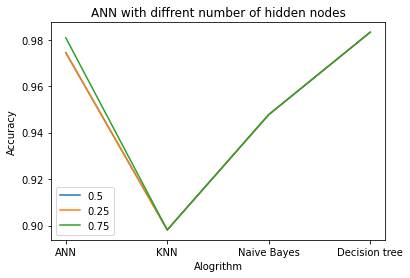

In [291]:
val = ['ANN','KNN','Naive Bayes','Decision tree']
plt.title('ANN with diffrent number of hidden nodes')
plt.plot(val, val1, label='0.5')
plt.plot(val, val2, label='0.25')
plt.plot(val, val3, label='0.75')
plt.legend()
plt.xlabel('Alogrithm')
plt.ylabel('Accuracy')
plt.show()

We observe that for KNN ,Naive Bayes and Decision Tree the accuracy converges to the same point 

But for ANN the 1/4 the of the dataset shows lower accuracy than the other two dataset